# Notebook to extract the length of the audio files in FSC

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# %pip install matplotlib

In [15]:
os.listdir('.')

['data',
 'Fluent Speech Commands Public License.pdf',
 'length_extraction.ipynb',
 'readme.md',
 'wavs']

In [16]:
os.listdir('data')

['speaker_demographics.csv',
 'test_data.csv',
 'train_data.csv',
 'valid_data.csv']

In [17]:
# Load all CSV files in the data directory
data_dir = 'data'
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Create a dictionary to store the dataframes
dataframes = {}
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    dataframes[file] = pd.read_csv(file_path)

print("Loaded dataframes:", list(dataframes.keys()))
for name, df in dataframes.items():
    print(f"{name}: {len(df)} rows")

Loaded dataframes: ['speaker_demographics.csv', 'test_data.csv', 'train_data.csv', 'valid_data.csv']
speaker_demographics.csv: 101 rows
test_data.csv: 3793 rows
train_data.csv: 23132 rows
valid_data.csv: 3118 rows


In [18]:
# print sample content of each dataframe
for name, df in dataframes.items():
    print(f"\n{name}:")
    print(df.head())


speaker_demographics.csv:
          speakerId Self-reported fluency level     First Language spoken  \
0  eLQ3mNg27GHLkDej                       native  English (United States)   
1  7NqqnAOPVVSKnxyv                       native  English (United States)   
2  ZebMRl5Z7dhrPKRD                       native  English (United States)   
3  7NEaXjeLX3sg3yDB                       native  English (United States)   
4  jgxq52DoPpsR9ZRx                       native  English (United States)   

  Current language used for work/school gender ageRange  
0               English (United States)   male    22-40  
1               English (United States)   male    22-40  
2               English (United States)   male    41-65  
3               English (United States)   male    41-65  
4               English (United States)   male    22-40  

test_data.csv:
   Unnamed: 0                                               path  \
0           0  wavs/speakers/4BrX8aDqK2cLZRYl/cbdf5700-452c-1...   
1         

In [19]:
import pandas as pd

# File paths
train_file = "data/train_data.csv"
valid_file = "data/valid_data.csv"
test_file = "data/test_data.csv"

# Load datasets
train_df = pd.read_csv(train_file)
valid_df = pd.read_csv(valid_file)
test_df = pd.read_csv(test_file)

# Display basic info
train_info = train_df.info()
valid_info = valid_df.info()
test_info = test_df.info()

# Display first few rows of each dataset
train_head = train_df.head()
valid_head = valid_df.head()
test_head = test_df.head()

train_info, train_head, valid_info, valid_head, test_info, test_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23132 entries, 0 to 23131
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     23132 non-null  int64 
 1   path           23132 non-null  object
 2   speakerId      23132 non-null  object
 3   transcription  23132 non-null  object
 4   action         23132 non-null  object
 5   object         23132 non-null  object
 6   location       23132 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3118 non-null   int64 
 1   path           3118 non-null   object
 2   speakerId      3118 non-null   object
 3   transcription  3118 non-null   object
 4   action         3118 non-null   object
 5   object         3118 non-null   object
 6   

(None,
    Unnamed: 0                                               path  \
 0           0  wavs/speakers/2BqVo8kVB2Skwgyb/0a3129c0-4474-1...   
 1           1  wavs/speakers/2BqVo8kVB2Skwgyb/0ee42a80-4474-1...   
 2           2  wavs/speakers/2BqVo8kVB2Skwgyb/144d5be0-4474-1...   
 3           3  wavs/speakers/2BqVo8kVB2Skwgyb/1811b6e0-4474-1...   
 4           4  wavs/speakers/2BqVo8kVB2Skwgyb/1d9f3920-4474-1...   
 
           speakerId          transcription           action  object location  
 0  2BqVo8kVB2Skwgyb        Change language  change language    none     none  
 1  2BqVo8kVB2Skwgyb                 Resume         activate   music     none  
 2  2BqVo8kVB2Skwgyb     Turn the lights on         activate  lights     none  
 3  2BqVo8kVB2Skwgyb   Switch on the lights         activate  lights     none  
 4  2BqVo8kVB2Skwgyb  Switch off the lights       deactivate  lights     none  ,
 None,
    Unnamed: 0                                               path  \
 0           0  wavs

In [20]:
# Drop the Unnamed: 0 column
train_df.drop(columns=['Unnamed: 0'], inplace=True)
valid_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)

# Check for missing values
missing_train = train_df.isnull().sum()
missing_valid = valid_df.isnull().sum()
missing_test = test_df.isnull().sum()

missing_train, missing_valid, missing_test

(path             0
 speakerId        0
 transcription    0
 action           0
 object           0
 location         0
 dtype: int64,
 path             0
 speakerId        0
 transcription    0
 action           0
 object           0
 location         0
 dtype: int64,
 path             0
 speakerId        0
 transcription    0
 action           0
 object           0
 location         0
 dtype: int64)

In [21]:
# Get distribution of labels in training set
action_dist = train_df['action'].value_counts()
object_dist = train_df['object'].value_counts()
location_dist = train_df['location'].value_counts()

# Speaker distribution
speaker_dist = train_df['speakerId'].value_counts()

action_dist, object_dist, location_dist, speaker_dist.head(10)

(action
 increase           5953
 decrease           5697
 activate           3822
 deactivate         3090
 change language    2479
 bring              2091
 Name: count, dtype: int64,
 object
 heat         7255
 lights       4794
 volume       4395
 music        1326
 none          994
 lamp          792
 newspaper     551
 socks         538
 shoes         536
 juice         466
 Chinese       449
 English       349
 Korean        345
 German        342
 Name: count, dtype: int64,
 location
 none        14150
 washroom     3962
 kitchen      2608
 bedroom      2412
 Name: count, dtype: int64,
 speakerId
 R3mXwwoaX9IoRVKe     497
 9EWlVBQo9rtqRYdy     493
 2ojo7YRL7Gck83Z3     492
 zZezMeg5XvcbRdg3     490
 AY5e3mMgZkIyG3Ox     486
 R3mexpM2YAtdPbL7     484
 Rq9EA8dEeZcEwada2    482
 8e5qRjN7dGuovkRY     481
 anvKyBjB5OiP5dYZ     481
 kNnmb7MdArswxLYw     480
 Name: count, dtype: int64)

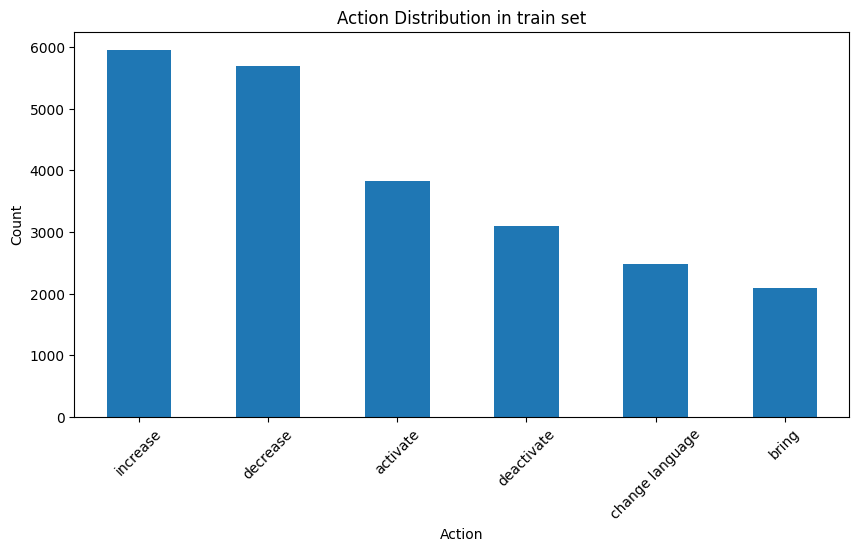

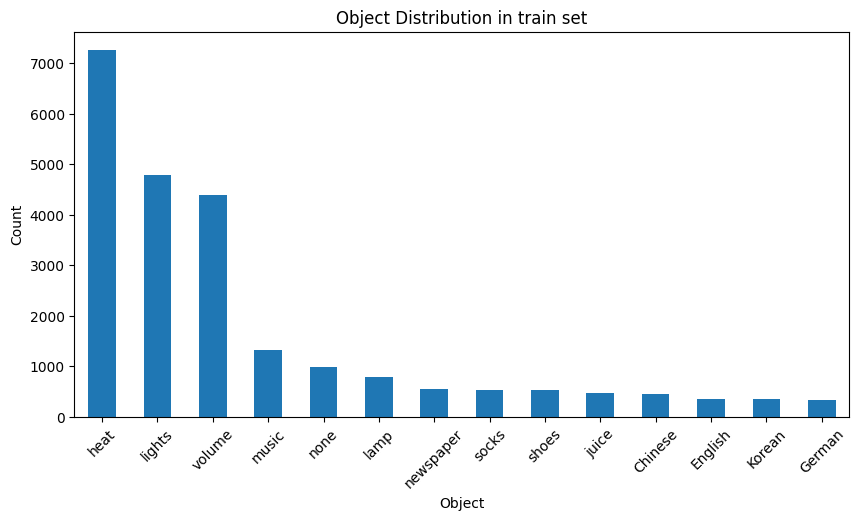

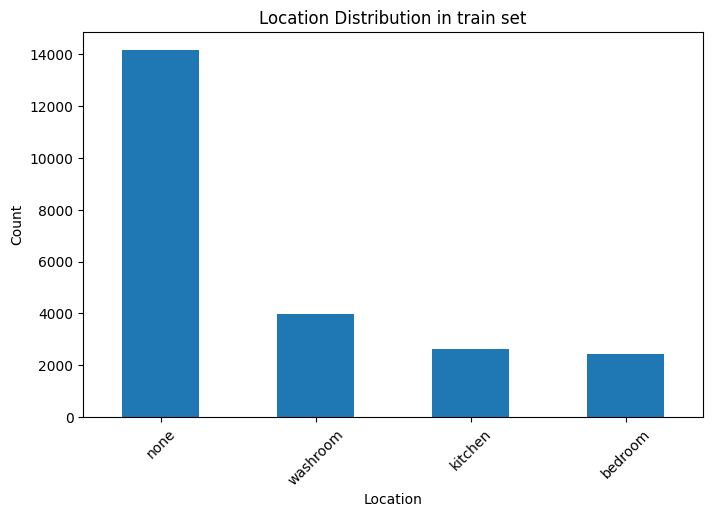

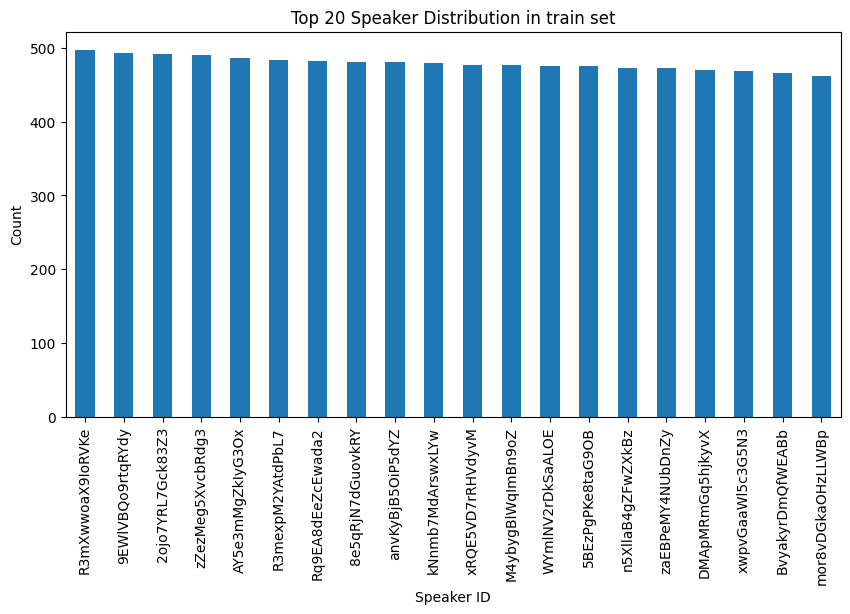

In [22]:
import matplotlib.pyplot as plt

# Plot Action Distribution
plt.figure(figsize=(10,5))
train_df['action'].value_counts().plot(kind='bar', title='Action Distribution in train set')
plt.xlabel("Action")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot Object Distribution
plt.figure(figsize=(10,5))
train_df['object'].value_counts().plot(kind='bar', title='Object Distribution in train set')
plt.xlabel("Object")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot Location Distribution
plt.figure(figsize=(8,5))
train_df['location'].value_counts().plot(kind='bar', title='Location Distribution in train set')
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot Speaker Distribution (Top 20)
plt.figure(figsize=(10,5))
train_df['speakerId'].value_counts().head(20).plot(kind='bar', title='Top 20 Speaker Distribution in train set')
plt.xlabel("Speaker ID")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [23]:
import os

# Extract a few sample file paths to check existence
sample_paths = train_df['path'].sample(5).tolist()

# Check if files exist
file_existence = {path: os.path.exists(path) for path in sample_paths}
file_existence

{'wavs/speakers/n5XllaB4gZFwZXkBz/ead3d6d0-45f0-11e9-aa19-e96346c3828f.wav': True,
 'wavs/speakers/oRrwPDNPlAieQr8Q/1510e6d0-4520-11e9-a843-8db76f4b5e29.wav': True,
 'wavs/speakers/ppzZqYxGkESMdA5Az/2a278610-4470-11e9-a9a5-5dbec3b8816a.wav': True,
 'wavs/speakers/W4XOzzNEbrtZz4dW/657edcd0-44d0-11e9-a8b6-e96f2628bf65.wav': True,
 'wavs/speakers/2BqVo8kVB2Skwgyb/e9fe9250-4478-11e9-a9a5-5dbec3b8816a.wav': True}

In [27]:
#check if there are any missing files in the datasets for whom the path is specified

# Check if files exist
train_existence = train_df['path'].apply(lambda x: os.path.exists(x))

# Count missing files safely
missing_files = (train_existence == False).sum()

print(f"Number of missing files: {missing_files}")

Number of missing files: 0


In [24]:
import librosa

# Load an audio file using librosa
audio_path = sample_paths[0]

# Load audio file
audio, sr = librosa.load(audio_path)

In [25]:
sr

22050

In [28]:
# for the train and test and valid dfs let us compute the length of the audio files and generate new csv files with the column 'duration' added to the dataframes. we use tqdm to show how much time is left for the computation and the coverage of the files that have been processed

from tqdm import tqdm


def compute_audio_duration(df):
    durations = []
    for path in tqdm(df['path'], desc="Processing audio files"):
        try:
            audio, sr = librosa.load(path)
            duration = librosa.get_duration(y=audio, sr=sr)
        except Exception as e:
            print(f"Error processing {path}: {e}")
            duration = None
        durations.append(duration)

    df['duration'] = durations
    return df

train_df = compute_audio_duration(train_df)

Processing audio files: 100%|██████████| 23132/23132 [07:33<00:00, 50.98it/s]


In [29]:
valid_df = compute_audio_duration(valid_df)
test_df = compute_audio_duration(test_df)

Processing audio files: 100%|██████████| 3793/3793 [01:04<00:00, 58.76it/s]


In [30]:
# Save updated CSVs
train_df.to_csv("train_data_with_duration.csv", index=False)
valid_df.to_csv("valid_data_with_duration.csv", index=False)
test_df.to_csv("test_data_with_duration.csv", index=False)

print("Duration computation complete. New CSV files saved.")

Duration computation complete. New CSV files saved.
